# テキストデータの可視化の練習

『三四郎』は、夏目漱石の前記三部作と呼ばれる作品群の一部です。

[『三四郎』](https://www.aozora.gr.jp/cards/000148/card794.html)（1909）・[『それから』](https://www.aozora.gr.jp/cards/000148/card1746.html)（1909）・[『門』](https://www.aozora.gr.jp/cards/000148/card785.html)（1910）の三部作を一つのコーパスとしてまとめて分析してみましょう。

『三四郎』だけの分析と比べると、どのような特徴が出てくるでしょうか？

## データの用意

In [1]:
# ファイルをダウンロードする
!curl -O https://www.aozora.gr.jp/cards/000148/files/794_ruby_4237.zip
!curl -O https://www.aozora.gr.jp/cards/000148/files/1746_ruby_18324.zip
!curl -O https://www.aozora.gr.jp/cards/000148/files/785_ruby_1656.zip
# textフォルダ作る
!mkdir -p text
# ファイルをtextフォルダに解凍
!unzip -d text -o 794_ruby_4237.zip
!unzip -d text -o 1746_ruby_18324.zip
!unzip -d text -o 785_ruby_1656.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  154k  100  154k    0     0  1091k      0 --:--:-- --:--:-- --:--:-- 1099k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  197k  100  197k    0     0  1870k      0 --:--:-- --:--:-- --:--:-- 1899k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  147k  100  147k    0     0  2090k      0 --:

Archive:  794_ruby_4237.zip
  inflating: text/sanshiro.txt       
Archive:  1746_ruby_18324.zip
Made with WinArchiver Lite (http://www.tida.bz/macwinzipper)
  inflating: text/sorekara.txt       
Archive:  785_ruby_1656.zip
  inflating: text/mon.txt            


In [2]:
# 青空文庫の記法を削除する

import re

input_fn = "text/sanshiro.txt"
output_fn = "text/sanshiro.stripruby.txt"

with open(input_fn, encoding="shift_jis") as fin, open(output_fn, mode="w") as fout:
    for line in fin:
        fout.write(re.sub(r"《[^》]+》|［[^］]+］|〔[^〕]+〕| [｜]", "", line))

In [3]:
input_fn = "text/sorekara.txt"
output_fn = "text/sorekara.stripruby.txt"

with open(input_fn, encoding="shift_jis") as fin, open(output_fn, mode="w") as fout:
    for line in fin:
        fout.write(re.sub(r"《[^》]+》|［[^］]+］|〔[^〕]+〕| [｜]", "", line))

In [4]:
input_fn = "text/mon.txt"
output_fn = "text/mon.stripruby.txt"

with open(input_fn, encoding="shift_jis") as fin, open(output_fn, mode="w") as fout:
    for line in fin:
        fout.write(re.sub(r"《[^》]+》|［[^］]+］|〔[^〕]+〕| [｜]", "", line))

In [5]:
import sys

# 冒頭と末尾の説明を取り除く（何行取り除くかは目視で確認）

if sys.platform == "darwin":
    !brew install coreutils
    !tail -n +22 text/sanshiro.stripruby.txt | ghead -n -14 > text/sanshiro.corpus.txt
else:
    !tail -n +22 text/sanshiro.stripruby.txt | head -n -14 > text/sanshiro.corpus.txt

In [6]:
if sys.platform == "darwin":
    !brew install coreutils
    !tail -n +22 text/sorekara.stripruby.txt | ghead -n -14 > text/sorekara.corpus.txt
else:
    !tail -n +22 text/sorekara.stripruby.txt | head -n -14 > text/sorekara.corpus.txt

In [7]:
if sys.platform == "darwin":
    !brew install coreutils
    !tail -n +18 text/mon.stripruby.txt | ghead -n -14 > text/mon.corpus.txt
else:
    !tail -n +18 text/mon.stripruby.txt | head -n -14 > text/mon.corpus.txt

In [8]:
# 3つのファイルを統合する

!cat text/sanshiro.corpus.txt text/sorekara.corpus.txt text/mon.corpus.txt > text/all.corpus.txt

これで、三作品をまとめて分析する準備ができました。

演習の内容を参考にして、ワードクラウド、共起ネットワーク、共起ヒートマップを作ってみましょう。

## ワードクラウド

In [ ]:
# your code goes here

fpath = "C:/Users/yuuum/AppData/Local/Microsoft/Windows/Fonts/NotoSansJP-VariableFont_wght.ttf"
input_fn = "text/all.corpus.txt"



In [ ]:
# ファイルを読み込み、テキストを一行ずつ解析
import spacy

nlp = spacy.load("ja_ginza")

all_tokens = []
with open(input_fn, "r") as f:
    for line in f:
        tokens = [token for token in nlp(line)]
        all_tokens.extend(tokens)



In [7]:
from collections import Counter

# 分析対象とする品詞（内容語 - 名詞、動詞、形容詞）と不要語（ストップワード）を指定する
include_pos = ("NOUN", "VERB", "ADJ", "?????")
stopwords = ("する", "ある", "ない", "いう", "もの", "こと", "よう", "なる", "ほう", "いる", "くる", "さん",\
              "ゐる", "事")

# 単語の頻度を数える
counter = Counter(token.lemma_ for token in all_tokens if token.pos_ in include_pos and token.lemma_ not in stopwords)

# 出現頻度top 20を出力する
for word, count in counter.most_common(20):
    print(f"{count:>5} {word}")



 1172 来る
  944 見る
  941 御
  849 云ふ
  845 時
  782 自分
  779 出る
  680 聞く
  666 云う
  636 行く
  619 言う
  590 つ
  581 中
  572 人
  564 上
  562 所
  535 米
  502 気
  498 方
  472 女


In [8]:
words = [token.lemma_ for token in all_tokens if token.pos_ in include_pos and token.lemma_ not in stopwords]

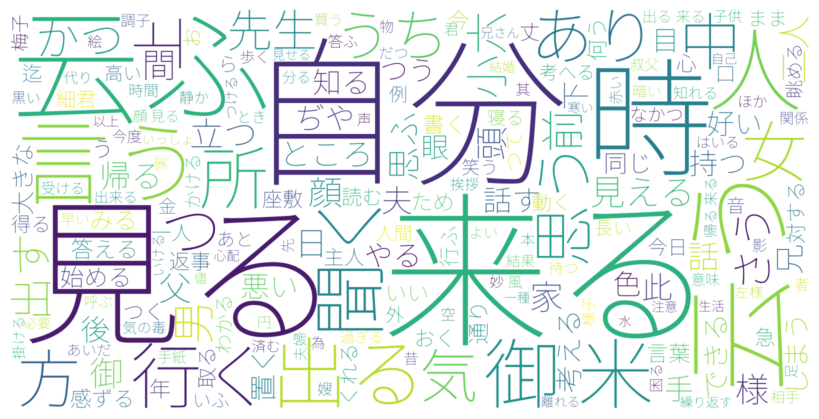

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ワードクラウドの表示設定と作成
wordcloud = WordCloud(
    width=1600, height=800,
    background_color="white", font_path=fpath
).generate(' '.join(words))

# プロット
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.savefig("wordcloud.png", dpi=300)
plt.show()

## 共起ネットワーク

In [10]:
# your code goes here
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

def extract_words(sent, pos_tags, stopwords):
    """
    分析対象の品詞であり、不要語ではない単語を抽出する
    """
    words = [token.lemma_ for token in sent if token.pos_ in pos_tags and token.lemma_ not in stopwords]
    return words


def count_cooccurrence(sents, token_length="{2,}"):
    """
    同じ文中に共起する単語を行列形式で列挙する
    """
    token_pattern = f"\\b\\w{token_length}\\b"
    count_model = CountVectorizer(token_pattern=token_pattern)

    X = count_model.fit_transform(sents)
    words = count_model.get_feature_names_out()
    word_counts = np.asarray(X.sum(axis=0)).reshape(-1)

    X[X > 0] = 1 # 同じ共起が2以上出現しても1とする
    Xc = (X.T * X) # 共起行列を求めるための掛け算をする、csr形式の疎行列

    return words, word_counts, Xc, X


def find_sentence_by_cooccurrence(X, idxs):
    """
    指定された共起を含む文を見つける
    """
    occur_flags = (X[:, idxs[0]] > 0)
    for idx in idxs[1:]:
        occur_flags = occur_flags.multiply(X[:, idx] > 0)

    return occur_flags.nonzero()[0]

In [13]:
# 文章を解析し、共起を求める
include_pos = ("NOUN", "VERB", "ADJ", "PROPN")
stopwords = ("する", "ある", "ない", "いう", "もの", "こと", "よう", "なる", "ほう", "いる", "くる", "さん",\
             "ゐる", "事")

sents = []
with open(input_fn, "r") as f:
    for line in f:
        doc = nlp(line)
        tmp = [' '.join(extract_words(sent, include_pos, stopwords)) for sent in doc.sents]
        sents.extend(tmp)

words, word_counts, Xc, X = count_cooccurrence(sents)

In [14]:
# 共起ランキングを出力する
# 共起行列Xcは疎行列なので、非ゼロ要素のみをカウンタに格納する
counter = Counter()
for i, j in zip(*Xc.nonzero()):
    if i >= j:
        continue
    counter[(i, j)] += Xc[i, j]

# 共起の出現頻度top 20を出力する
for (i, j), c in counter.most_common(20):
    print(f"{c:>3d} ({words[i]}, {words[j]})")

160 (云ふ, 代助)
134 (云う, 宗助)
127 (代助, 見る)
126 (出る, 来る)
120 (先生, 広田)
108 (帰る, 来る)
105 (三千代, 代助)
103 (三四郎, 見る)
 99 (つう, 代助)
 95 (かつ, 代助)
 94 (代助, 平岡)
 89 (代助, 来る)
 89 (来る, 見る)
 85 (あり, 代助)
 85 (云う, 来る)
 83 (代助, 自分)
 82 (三四郎, 言う)
 81 (云ふ, 来る)
 80 (宗助, 見る)
 76 (代助, 思ふ)


In [22]:
import networkx as nx
from pyvis.network import Network
import japanize_matplotlib

def word_weights(words, word_counts):
    """
    単語の最多頻度が1となるような相対値として単語の重みを求める
    """
    count_max = word_counts.max()
    weights = [(word, {"weight": count / count_max})
               for word, count in zip(words, word_counts)]
    return weights

def cooccurrence_weights(words, Xc, weight_cutoff):
    """
    共起の最多頻度が1となるような相対値として共起の重みを求める
    共起の重みがweight_cutoffより低い共起は除外する
    """
    Xc_max = Xc.max()
    cutoff = weight_cutoff * Xc_max
    weights = [(words[i], words[j], Xc[i, j] / Xc_max)
               for i, j in zip(*Xc.nonzero()) if i < j and Xc[i, j] > cutoff]
    return weights

def create_network(words, word_counts, Xc, weight_cutoff):
    """
    語、単語頻度、共起行列から共起ネットワークをNetworkX形式で得る
    """
    G = nx.Graph()

    weights_w = word_weights(words, word_counts)
    G.add_nodes_from(weights_w)

    weights_c = cooccurrence_weights(words, Xc, weight_cutoff)
    G.add_weighted_edges_from(weights_c)

    G.remove_nodes_from(list(nx.isolates(G)))
    return G

def pyplot_network(G):
    """
    NetworkX形式で与えられた共起ネットワークをpyplotで描画する
    """
    plt.figure(figsize=(10, 10))
    pos = nx.spring_layout(G, k=0.1)

    weights_n = np.array(list(nx.get_node_attributes(G, "weight").values()))
    nx.draw_networkx_nodes(G, pos, node_size=300 * weights_n)
    weights_e = np.array(list(nx.get_edge_attributes(G, "weight").values()))
    nx.draw_networkx_edges(G, pos, width=20 * weights_e)

    nx.draw_networkx_labels(G, pos, font_family="IPAexGothic")

    plt.axis("off")
    plt.tight_layout()
    plt.show()

def nx2pyvis_G(G):
    """
    NetworkX形式で与えられた共起ネットワークをpyvisで描画する
    """
    pyvis_G = Network(width="800px", height="800px", notebook=True)
    for node, attrs in G.nodes(data=True):
        pyvis_G.add_node(node, title=node, size=30 * attrs["weight"])
    for node1, node2, attrs in G.edges(data=True):
        pyvis_G.add_edge(node1, node2, width=20 * attrs["weight"])

    return pyvis_G

In [23]:
# ネットワークを作る
G = create_network(words, word_counts, Xc, 0.01)

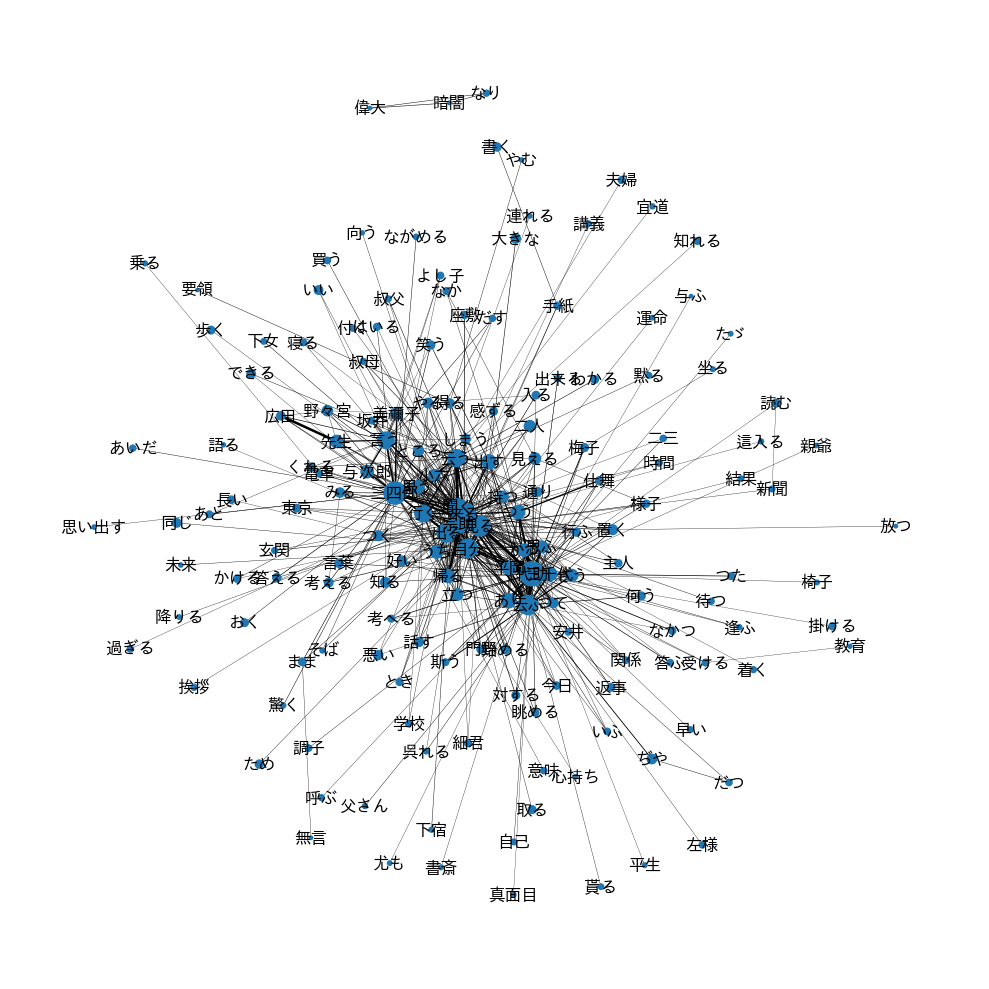

In [24]:
# 静的ビジュアライゼーション
pyplot_network(G)

In [25]:
# インタラクティブなビジュアライゼーション
pyvis_G = nx2pyvis_G(G)
pyvis_G.show_buttons()
pyvis_G.show("network.html")

network.html


## 共起ヒートマップ

In [18]:
# your code goes here